<a href="https://colab.research.google.com/github/shalini24k/recommendation-system/blob/main/2022506066_Shalini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Install requirements

In [ ]:
!git clone https://github.com/tensorflow/examples
%cd examples/lite/examples/recommendation/ml/
!pip install -r requirements.txt

Cloning into 'examples'...
remote: Enumerating objects: 23745, done.
remote: Total 23745 (delta 0), reused 0 (delta 0), pack-reused 23745
Receiving objects: 100% (23745/23745), 44.08 MiB | 12.11 MiB/s, done.
Resolving deltas: 100% (12942/12942), done.
/content/examples/lite/examples/recommendation/ml


2.Importing Libraries

In [ ]:
!pip install surprise
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357266 sha256=9f55ee065d1320409cea597343e1924f334ccbb57a7e49c7a81cb18ed6e383bd
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


3.Download and unzip data

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import urllib.request
import zipfile

# Download and unzip the dataset
DATASET_LINK = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
urllib.request.urlretrieve(DATASET_LINK, 'ml-100k.zip')

with zipfile.ZipFile('ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('ml-100k')

# Load the dataset
ratings_file = 'ml-100k/u.data'
items_file = 'ml-100k/u.item'

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_data = pd.read_csv(ratings_file, sep='\t', names=column_names)

item_info = pd.read_csv(items_file, sep='|', encoding='latin-1', header=None, usecols=[0, 1])
item_info.columns = ['item_id', 'title']

# Display basic info
print("Dataset info:")
print(ratings_data.info())
print("\nFirst few rows of the dataset:")
print(ratings_data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

First few rows of the dataset:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [ ]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.

Archive:  ml-100k.zip
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


Loading MovieLens dataset

In [ ]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [ ]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
ratings_dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
ratings_dataset.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# Load the dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# Load item information
item_info = pd.read_csv('ml-100k/u.item', sep='|', header=None, encoding='latin-1')
item_info = item_info[[0, 1]]
item_info.columns = ['item_id', 'title']

# Display basic info
print("Dataset info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

First few rows of the dataset:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


Create a Collaborative Filtering Model

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_item_matrix = ratings_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
user_item_sparse_matrix = csr_matrix(user_item_matrix.values)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Define recommendation function

In [ ]:
def recommend_movies(user_id, num_recommendations=5):
    distances, indices = knn.kneighbors(user_item_matrix.loc[user_id, :].values.reshape(1, -1), n_neighbors=num_recommendations+1)
    indices = indices.flatten()[1:]
    distances = distances.flatten()[1:]

    recommendations = []
    for i, idx in enumerate(indices):
        movie_id = user_item_matrix.columns[idx]
        title = item_info[item_info['item_id'] == movie_id]['title'].values[0]
        recommendations.append((title, distances[i]))

    return recommendations

Get Recommendations for a User

In [ ]:
import matplotlib.pyplot as plt

def get_recommendations_for_user(user_id, num_recommendations=5):
    recommendations = recommend_movies(user_id, num_recommendations)

    print(f"Top {num_recommendations} recommendations for User {user_id}:")
    titles = []
    similarities = []

    for i, (title, distance) in enumerate(recommendations):
        titles.append(title)
        similarities.append(1 - distance)  # Similarity score
        print(f"{i+1}: {title} (Similarity: {1 - distance:.2f})")

    # Plotting the recommendations
    plt.figure(figsize=(10, 5))
    plt.barh(titles, similarities, color='skyblue')
    plt.xlabel('Similarity')
    plt.title(f'Top {num_recommendations} Recommendations for User {user_id}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest recommendation on top
    plt.show()

# Example: Get recommendations for user_id = 10
user_id_to_recommend = 10
num_recommendations = 5
get_recommendations_for_user(user_id_to_recommend, num_recommendations)

Top 5 recommendations for User 10:
1: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) (Similarity: 0.56)
2: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) (Similarity: 0.55)
3: Jaws (1975) (Similarity: 0.54)
4: FairyTale: A True Story (1997) (Similarity: 0.54)
5: My Own Private Idaho (1991) (Similarity: 0.53)


To generate some graphs to visualise data

In [ ]:
!pip install matplotlib seaborn

Rating distribution

<ipython-input-27-f1a30b3936b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_data, palette='coolwarm')


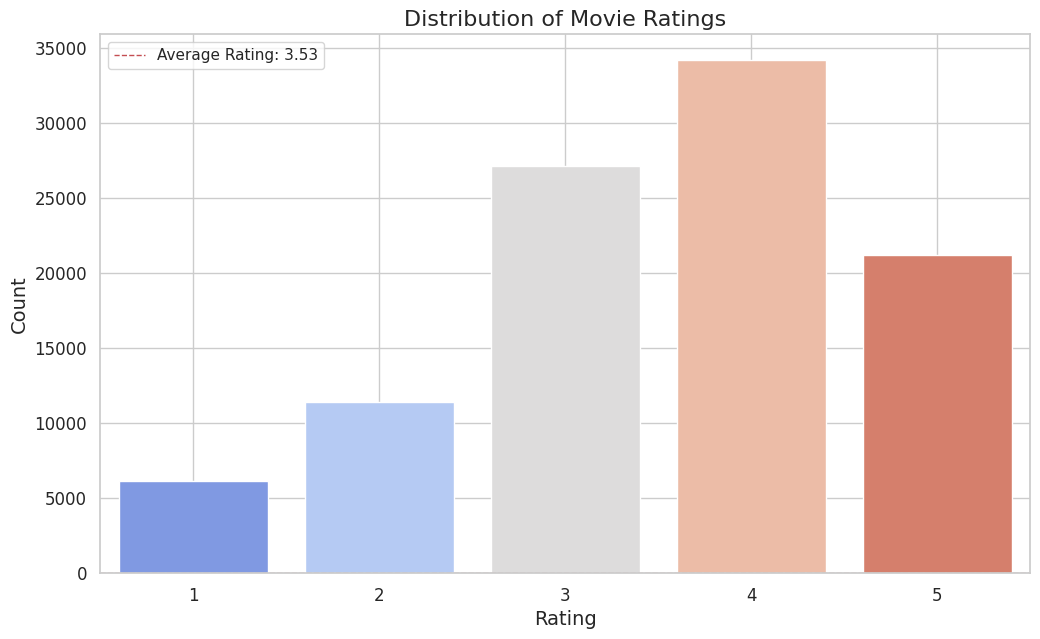

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ratings_data and item_info are already loaded
# Distribution of ratings
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Change the palette to 'coolwarm'
sns.countplot(x='rating', data=ratings_data, palette='coolwarm')

# Adding average line for ratings
avg_rating = ratings_data['rating'].mean()
plt.axhline(y=avg_rating, color='r', linestyle='--', linewidth=1, label=f'Average Rating: {avg_rating:.2f}')

# Customize the plot
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

Rating heat map by user and movie

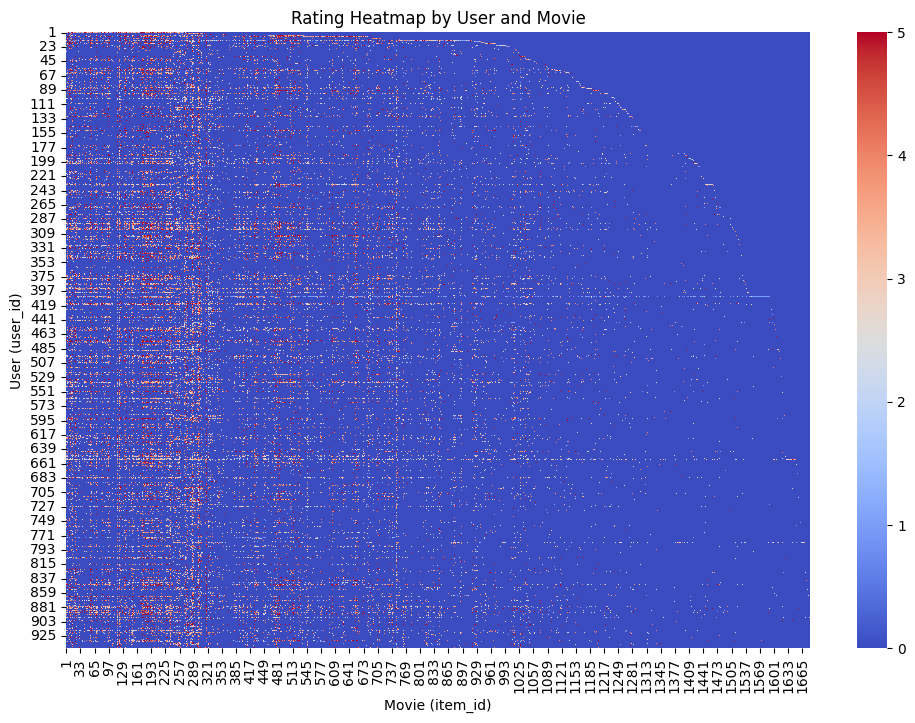

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ratings_data is your DataFrame containing 'user_id', 'item_id', and 'rating'
ratings_matrix = ratings_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(ratings_matrix, cmap='viridis', cbar=True, annot=True, fmt=".1f", linewidths=.5)
plt.title('Rating Heatmap by User and Movie', fontsize=16)
plt.xlabel('Movie ID (item_id)', fontsize=14)
plt.ylabel('User ID (user_id)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Average rating by movie

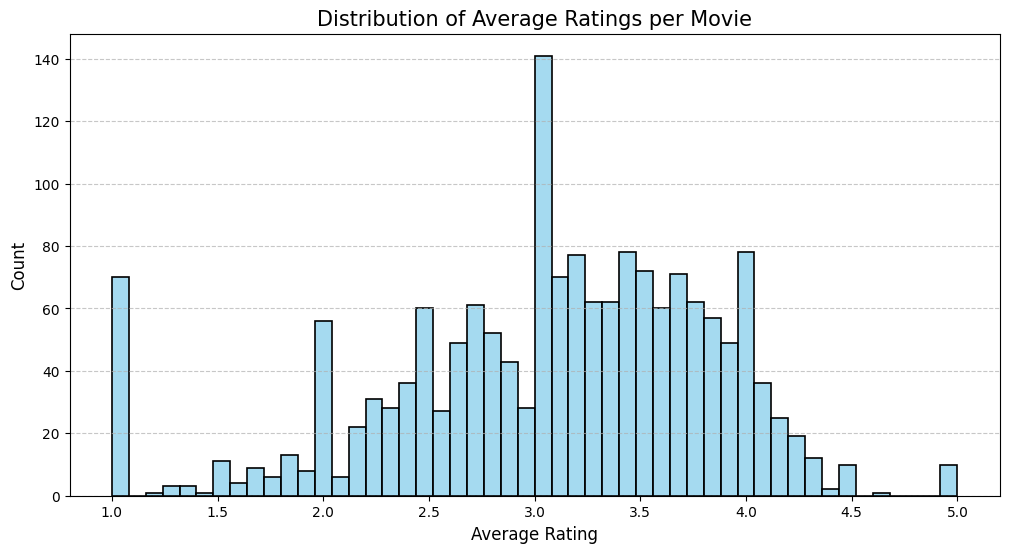

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(avg_ratings, bins=50, kde=True, color='darkblue', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Average Ratings per Movie', fontsize=18)
plt.xlabel('Average Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Number of ratings over time

<ipython-input-22-4fcd08f5b106>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=ratings_data, palette='pastel', edgecolor='black')


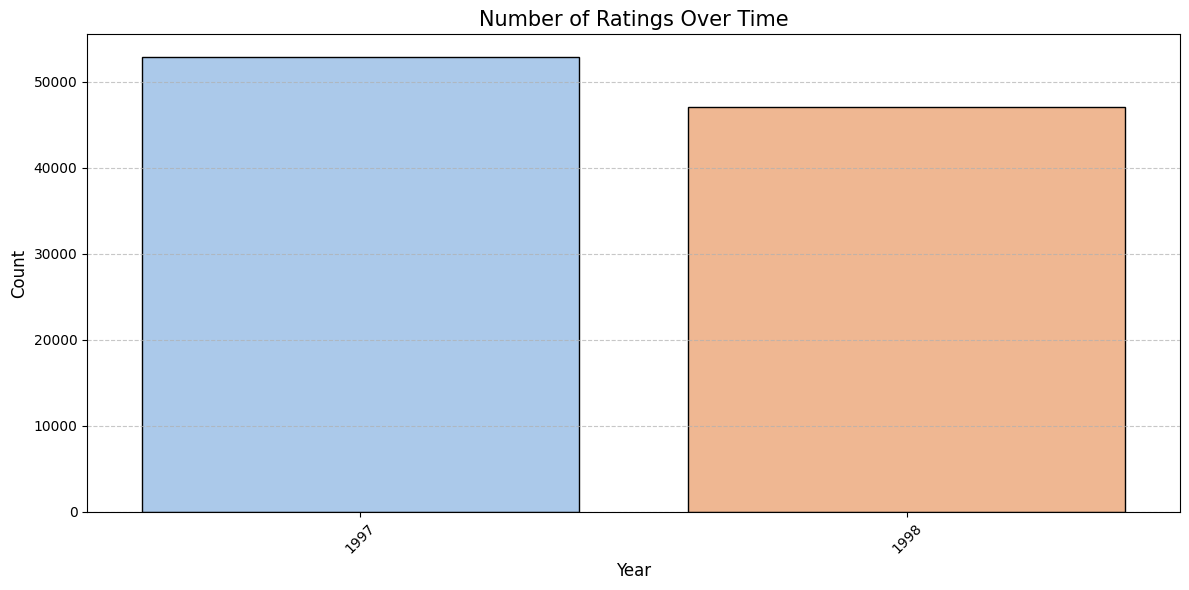

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='year', data=ratings_data, palette='muted', edgecolor='black')
plt.title('Number of Ratings Over Time', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Number of ratings per movie

<ipython-input-26-7128cfc2c90b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count_per_movie.index, y=ratings_count_per_movie.values, palette='viridis')


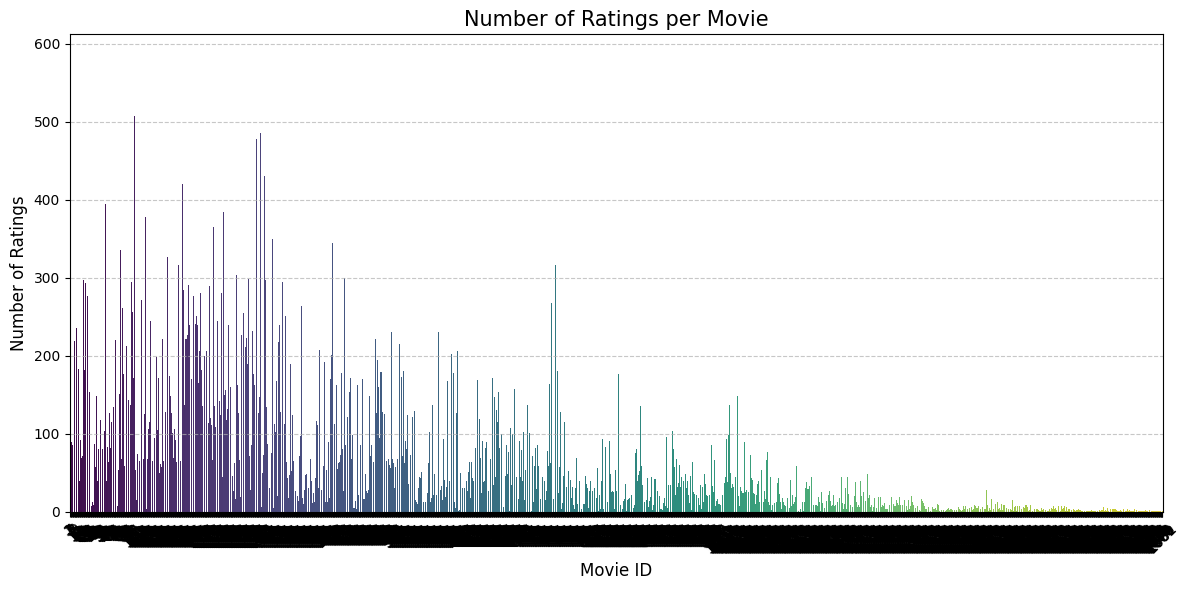

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=ratings_count_per_movie.index, y=ratings_count_per_movie.values, palette='plasma')
plt.title('Number of Ratings per Movie', fontsize=18)
plt.xlabel('Movie ID', fontsize=15)
plt.ylabel('Number of Ratings', fontsize=15)
plt.xticks(rotation=60, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
Number of Ratings per Movie
